In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.tail()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
#any missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution of age value

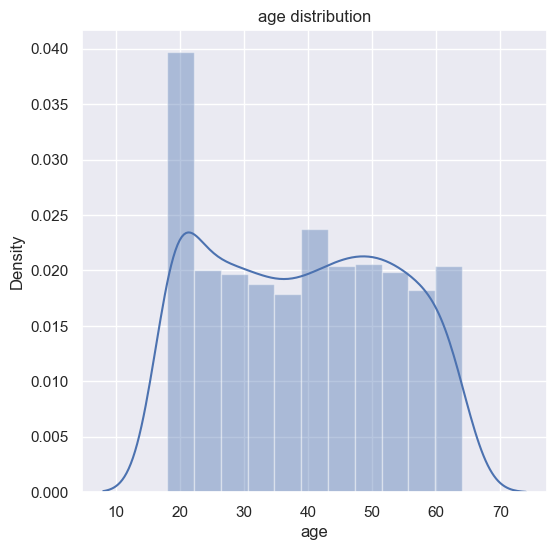

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("age distribution")
plt.show()

# gender column

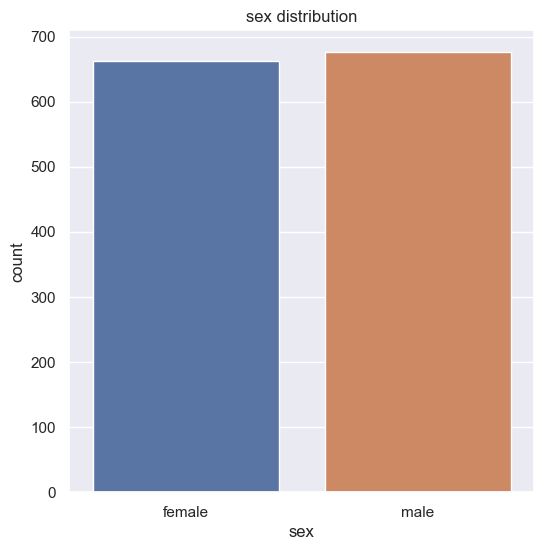

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('sex distribution')
plt.show()

In [9]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

# BMI Distribution

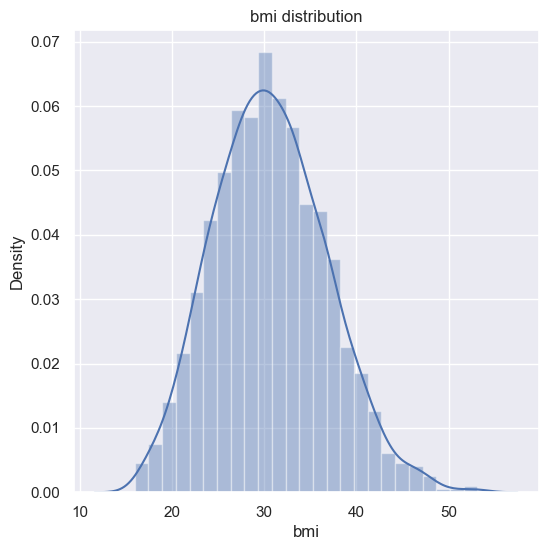

In [10]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

# Children Column

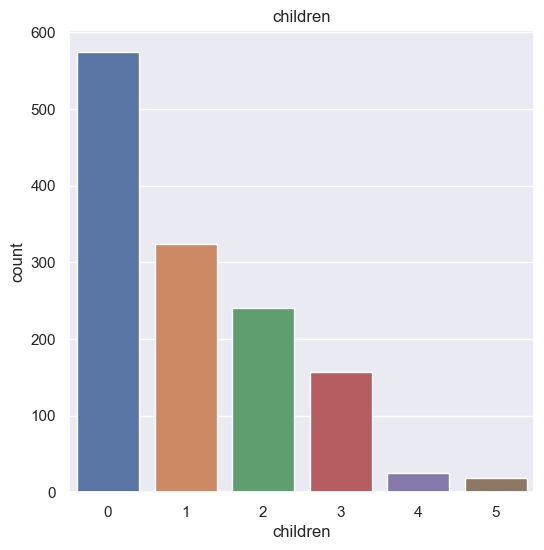

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children')
plt.show()

In [12]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

# Smoker Column

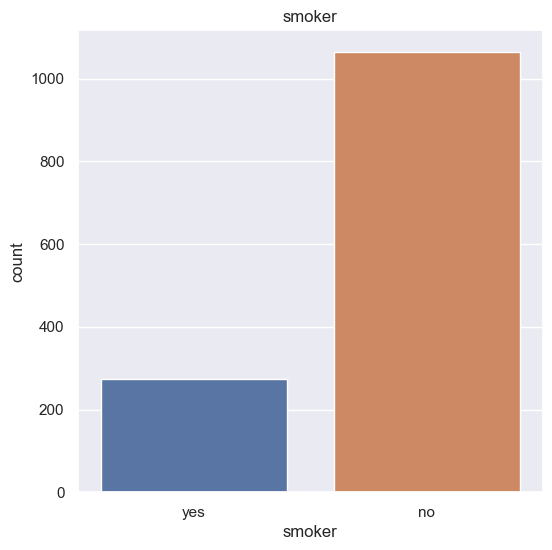

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker')
plt.show()

In [14]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

# region column


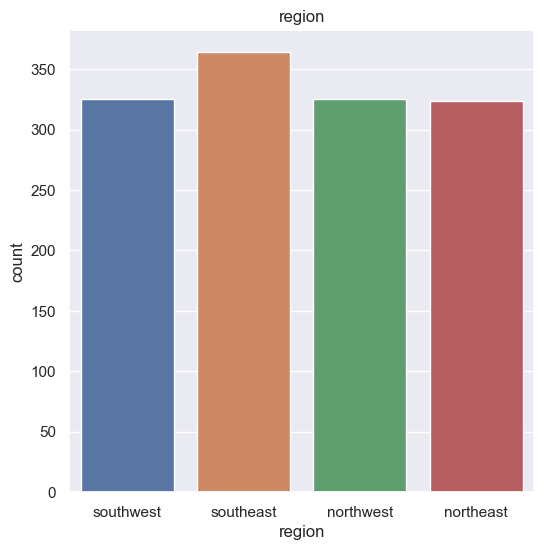

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('region')
plt.show()

In [16]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# Charges value

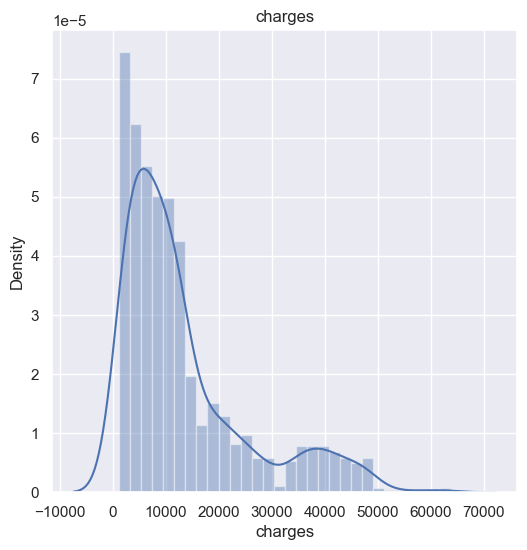

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges')
plt.show()

In [18]:
df['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

# Encoding the categorical features

In [19]:
#to encode the sex column
df.replace({'sex':{'Male':0 , 'Female':1}}, inplace=True)

#encoding the smoker column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#encoding the region
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


In [20]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [22]:
print(x)

      age     sex     bmi  children  smoker  region
0      19  female  27.900         0       0       1
1      18    male  33.770         1       1       0
2      28    male  33.000         3       1       0
3      33    male  22.705         0       1       3
4      32    male  28.880         0       1       3
...   ...     ...     ...       ...     ...     ...
1333   50    male  30.970         3       1       3
1334   18  female  31.920         0       1       2
1335   18  female  36.850         0       1       0
1336   21  female  25.800         0       1       1
1337   61  female  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training or Testing Data

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [35]:
regressor = LinearRegression()

In [39]:
regressor.fit(x_train, y_train)

ValueError: could not convert string to float: 'female'

MODEL EVALUTION

In [32]:
#prediction on training data
training_data_prediction=regressor.predict(x_train)

ValueError: could not convert string to float: 'female'

In [33]:
#R squared value
r2_train=metrics.r2_score(y_train,trianing_data_prediction)
print('R squared value :' r2_train)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3420383061.py, line 3)